Key questions to be answered:
1. Can we group similar client requests together? (Eg. Google News)
2. Can we perform NER for unstructured data geared towards the Tech Industry
or Healthcare industry with reasonable accuracy?
3. Can we find hierarchical patterns in the topics for requests to identify
temporal directions of the requests?

Final deliverables:
1. A deployable ML model that performs NER with reasonable accuracy.
2. A clustering mechanism to find patterns from submitted topics or requests.
3. A hierarchical clustering method that can produce a hierarchical dendrogram
of topics submitted over a period of time.

Key activities:
1. Named Entity Recognition for short text paragraphs geared towards
identification of topics that imply technological or healthcare terms.
2. Unsupervised clustering of time-stamped topics.
3. Hierarchical clustering of topics or temporal sequence learning for identified
topics.

In [86]:
import pandas as pd, numpy as np, seaborn as sns, tensorflow as tf, matplotlib.pyplot as plt
pd.options.display.max_rows=999
pd.options.display.max_colwidth=1000

filepath = 'C:/Users/gemin/4B_Cap_data'

NER_DATASET - https://www.kaggle.com/code/naseralqaydeh/named-entity-recognition-ner-with-tensorflow

In [6]:
df = pd.read_csv(filepath + '/ner_dataset.csv',encoding= 'unicode_escape')
df.fillna(method='ffill', inplace=True)

In [7]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [8]:
len(np.unique(df['Sentence #']))

47959

In [46]:
df['Word'].value_counts()

the         52573
.           47761
,           32754
of          26354
in          26323
            ...  
Dateline        1
ISRO            1
G.              1
Madhavan        1
Bermel          1
Name: Word, Length: 35178, dtype: int64

In [9]:
def concatWords(data, sentence_number):
    
    words = list(data[data['Sentence #'] == 'Sentence: {}'.format(sentence_number)]['Word'])
    
    return ' '.join(words)

In [10]:
concatWords(df, 22480)

'Fisheries in 2006 - 7 landed 1,26,976 metric tons , of which 82 % ( 1,04,586 tons ) was krill ( Euphausia superba ) and 9.5 % ( 12,027 tons ) Patagonian toothfish ( Dissostichus eleginoides - also known as Chilean sea bass ) , compared to 1,27,910 tons in 2005 - 6 of which 83 % ( 1,06,591 tons ) was krill and 9.7 % ( 12,396 tons ) Patagonian toothfish ( estimated fishing from the area covered by the Convention of the Conservation of Antarctic Marine Living Resources ( CCAMLR ) , which extends slightly beyond the Southern Ocean area ) .'

In [11]:
print("Unique words - ", df.Word.nunique())
print("Unique tags - ", df.Tag.nunique())

Unique words -  35178
Unique tags -  17


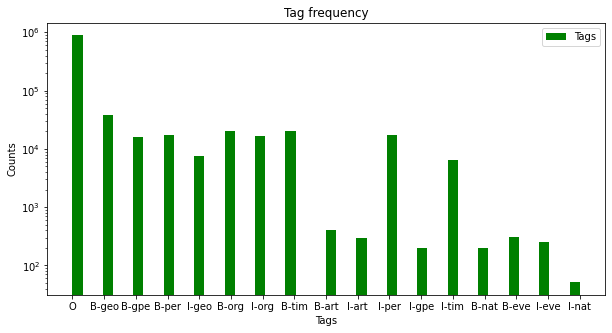

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df.Tag, log=True, label='Tags', color='g', bins=50)
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Tag frequency')
plt.legend()
plt.show()

In [13]:
def create_dataset(data):
    
    df_dict = {}
    
    for num in range(1, len(np.unique(data['Sentence #']))+1):
        
        concat_all = []
        
        each_sentence = data[data['Sentence #']  == 'Sentence: {}'.format(num)]

        concat_all.append(' '.join(list(each_sentence['Word'])))

        concat_all.append(list(each_sentence['POS']))

        concat_all.append(list(each_sentence['Tag']))
        
        df_dict['Sentence: {}'.format(num)] = concat_all
        
        if num % 10000 == 0:
            print("{} sentences are processed".format(num))
        
    return df_dict

In [14]:
df_dict = create_dataset(df)

10000 sentences are processed
20000 sentences are processed
30000 sentences are processed
40000 sentences are processed


,index,sentence,POS,Tag
sentence_num,,,,
0,Sentence: 1,Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, NN, IN, NNP, CC, VB, DT, NN, IN, JJ, NNS, IN, DT, NN, .]","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo, O, O, O, O, O, B-gpe, O, O, O, O, O]"
1,Sentence: 2,"Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as "" Bush Number One Terrorist "" and "" Stop the Bombings . ""","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, WP, VBD, NNS, IN, JJ, NNS, IN, ``, NNP, NN, CD, NN, ``, CC, ``, VB, DT, NNS, ., ``]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-per, O, O, O, O, O, O, O, O, O, O, O]"
2,Sentence: 3,They marched from the Houses of Parliament to a rally in Hyde Park .,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN, NNP, NNP, .]","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo, O]"
3,Sentence: 4,"Police put the number of marchers at 10,000 while organizers claimed it was 1,00,000 .","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, VBD, PRP, VBD, CD, .]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual conference of Britain 's ruling Labor Party in the southern English seaside resort of Brighton .,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, NNP, POS, VBG, NNP, NNP, IN, DT, JJ, JJ, NN, NN, IN, NNP, .]","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O, B-org, I-org, O, O, O, B-gpe, O, O, O, B-geo, O]"


In [31]:
df_full = (pd.DataFrame.from_dict(df_dict, orient='index', columns=['sentence','POS','Tag'])
           .reset_index()
           .rename({'index':'sentence_num'}, axis=1)
          )

df_full.head()

,sentence_num,sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, NN, IN, NNP, CC, VB, DT, NN, IN, JJ, NNS, IN, DT, NN, .]","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo, O, O, O, O, O, B-gpe, O, O, O, O, O]"
1,Sentence: 2,"Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as "" Bush Number One Terrorist "" and "" Stop the Bombings . ""","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, WP, VBD, NNS, IN, JJ, NNS, IN, ``, NNP, NN, CD, NN, ``, CC, ``, VB, DT, NNS, ., ``]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-per, O, O, O, O, O, O, O, O, O, O, O]"
2,Sentence: 3,They marched from the Houses of Parliament to a rally in Hyde Park .,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN, NNP, NNP, .]","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo, O]"
3,Sentence: 4,"Police put the number of marchers at 10,000 while organizers claimed it was 1,00,000 .","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, VBD, PRP, VBD, CD, .]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual conference of Britain 's ruling Labor Party in the southern English seaside resort of Brighton .,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, NNP, POS, VBG, NNP, NNP, IN, DT, JJ, JJ, NN, NN, IN, NNP, .]","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O, B-org, I-org, O, O, O, B-gpe, O, O, O, B-geo, O]"


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=110
max_words=36000

X = list(df_full['sentence'])
y = list(df_full['Tag'])

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

In [51]:
word_index

{'the': 1,
 'in': 2,
 'of': 3,
 'to': 4,
 'a': 5,
 'and': 6,
 "'s": 7,
 'for': 8,
 'has': 9,
 'on': 10,
 'is': 11,
 'that': 12,
 'have': 13,
 'u': 14,
 'with': 15,
 'said': 16,
 'was': 17,
 'at': 18,
 'says': 19,
 's': 20,
 'from': 21,
 'by': 22,
 'he': 23,
 'an': 24,
 'as': 25,
 'say': 26,
 'it': 27,
 'are': 28,
 'were': 29,
 'his': 30,
 'president': 31,
 'will': 32,
 'officials': 33,
 'government': 34,
 'mr': 35,
 'two': 36,
 'been': 37,
 'killed': 38,
 'people': 39,
 'after': 40,
 'not': 41,
 'its': 42,
 'be': 43,
 'but': 44,
 'they': 45,
 'more': 46,
 'also': 47,
 'year': 48,
 'new': 49,
 'united': 50,
 'military': 51,
 'last': 52,
 'who': 53,
 'country': 54,
 'than': 55,
 'minister': 56,
 'police': 57,
 'one': 58,
 'their': 59,
 'iraq': 60,
 'which': 61,
 'security': 62,
 'this': 63,
 'about': 64,
 'other': 65,
 'states': 66,
 'had': 67,
 'least': 68,
 'state': 69,
 'three': 70,
 'tuesday': 71,
 'week': 72,
 'since': 73,
 'world': 74,
 'forces': 75,
 'thursday': 76,
 'group': 77,


In [52]:
idx2word = dict([(value, key) for (key, value) in word_index.items()])
idx2word

{1: 'the',
 2: 'in',
 3: 'of',
 4: 'to',
 5: 'a',
 6: 'and',
 7: "'s",
 8: 'for',
 9: 'has',
 10: 'on',
 11: 'is',
 12: 'that',
 13: 'have',
 14: 'u',
 15: 'with',
 16: 'said',
 17: 'was',
 18: 'at',
 19: 'says',
 20: 's',
 21: 'from',
 22: 'by',
 23: 'he',
 24: 'an',
 25: 'as',
 26: 'say',
 27: 'it',
 28: 'are',
 29: 'were',
 30: 'his',
 31: 'president',
 32: 'will',
 33: 'officials',
 34: 'government',
 35: 'mr',
 36: 'two',
 37: 'been',
 38: 'killed',
 39: 'people',
 40: 'after',
 41: 'not',
 42: 'its',
 43: 'be',
 44: 'but',
 45: 'they',
 46: 'more',
 47: 'also',
 48: 'year',
 49: 'new',
 50: 'united',
 51: 'military',
 52: 'last',
 53: 'who',
 54: 'country',
 55: 'than',
 56: 'minister',
 57: 'police',
 58: 'one',
 59: 'their',
 60: 'iraq',
 61: 'which',
 62: 'security',
 63: 'this',
 64: 'about',
 65: 'other',
 66: 'states',
 67: 'had',
 68: 'least',
 69: 'state',
 70: 'three',
 71: 'tuesday',
 72: 'week',
 73: 'since',
 74: 'world',
 75: 'forces',
 76: 'thursday',
 77: 'group',


In [53]:
word2idx = word_index
map2word = {}
for k, v in word2idx.items():
    map2word[v] = k

map2word

{1: 'the',
 2: 'in',
 3: 'of',
 4: 'to',
 5: 'a',
 6: 'and',
 7: "'s",
 8: 'for',
 9: 'has',
 10: 'on',
 11: 'is',
 12: 'that',
 13: 'have',
 14: 'u',
 15: 'with',
 16: 'said',
 17: 'was',
 18: 'at',
 19: 'says',
 20: 's',
 21: 'from',
 22: 'by',
 23: 'he',
 24: 'an',
 25: 'as',
 26: 'say',
 27: 'it',
 28: 'are',
 29: 'were',
 30: 'his',
 31: 'president',
 32: 'will',
 33: 'officials',
 34: 'government',
 35: 'mr',
 36: 'two',
 37: 'been',
 38: 'killed',
 39: 'people',
 40: 'after',
 41: 'not',
 42: 'its',
 43: 'be',
 44: 'but',
 45: 'they',
 46: 'more',
 47: 'also',
 48: 'year',
 49: 'new',
 50: 'united',
 51: 'military',
 52: 'last',
 53: 'who',
 54: 'country',
 55: 'than',
 56: 'minister',
 57: 'police',
 58: 'one',
 59: 'their',
 60: 'iraq',
 61: 'which',
 62: 'security',
 63: 'this',
 64: 'about',
 65: 'other',
 66: 'states',
 67: 'had',
 68: 'least',
 69: 'state',
 70: 'three',
 71: 'tuesday',
 72: 'week',
 73: 'since',
 74: 'world',
 75: 'forces',
 76: 'thursday',
 77: 'group',


In [54]:
X_padded = pad_sequences(sequences, maxlen=maxlen, padding='post')
X_padded[0]

array([ 260,    3,  997,   13, 1838,  245,  452,    4,  545,    1,  121,
          2,   60,    6,  595,    1,  861,    3,  184,   89,   21,   12,
         54,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [66]:
len(X_padded)

47959

In [56]:
tag2idx = {}
for idx, tag in enumerate(df.Tag.unique()):
    tag2idx[tag] = idx

tag2idx

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [57]:
map2tag = {}
for k, v in tag2idx.items():
    map2tag[v] = k
map2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [76]:
def preprocess_tags(maxlen, tags2id, Ys):
    
    y_encoded = []
    for y in Ys:
        tmp = []
        for tag in y:
            tmp.append(tags2id[tag])

        padded_tags = tmp + ([tags2id['O']] * (maxlen - len(tmp))) #'O' : 0
        y_encoded.append(padded_tags)
        
    return np.array(y_encoded)

In [77]:
y_tags = []
for t in y:
    y_tags.append(t)

y_encoded = preprocess_tags(maxlen, tag2idx, y_tags)

y_encoded[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_testval, y_train, y_testval = train_test_split(X_padded, y_encoded, random_state=42, test_size=.3)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, random_state=42, test_size=.5)

print('Training : ', len(X_train))
print('Validation : ', len(X_val))
print('Test : ', len(X_test))

Training :  33571
Validation :  7194
Test :  7194


In [79]:
X_train[1000]

array([ 224, 1145,  102,    4,  415,  116,    2,  407,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [84]:
y_train[1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
idx2word[729]

'nigeria'

In [88]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [94]:
embedding_dim = 300
num_tags = len(df.Tag.unique())

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 110, 300)          10800000  
                                                                 
 bidirectional_4 (Bidirectio  (None, 110, 200)         320800    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 110, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 110, 17)          3417      
 tributed)                                                       
                                                                 
Total params: 11,365,017
Trainable params: 11,365,017
Non-trainable params: 0
__________________________________________

In [96]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
epochs = model.fit(train_dataset,epochs=10, verbose=True, validation_data = val_dataset)

Epoch 1/10
255/255 [==============================] - 549s 2s/step - loss: 0.1784 - accuracy: 0.9662 - val_loss: 0.1109 - val_accuracy: 0.9709
Epoch 2/10
255/255 [==============================] - 560s 2s/step - loss: 0.0929 - accuracy: 0.9735 - val_loss: 0.0775 - val_accuracy: 0.9764
Epoch 3/10
255/255 [==============================] - 575s 2s/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 4/10
255/255 [==============================] - 594s 2s/step - loss: 0.0537 - accuracy: 0.9818 - val_loss: 0.0645 - val_accuracy: 0.9802
Epoch 5/10
255/255 [==============================] - 597s 2s/step - loss: 0.0449 - accuracy: 0.9845 - val_loss: 0.0656 - val_accuracy: 0.9803
Epoch 6/10
255/255 [==============================] - 602s 2s/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0680 - val_accuracy: 0.9805
Epoch 7/10
255/255 [==============================] - 603s 2s/step - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.0676 - val_accuracy: 0.9806

In [98]:
model.evaluate(test_dataset)

55/55 [==============================] - 22s 403ms/step - loss: 0.0778 - accuracy: 0.9805


[0.07784443348646164, 0.9804799556732178]

In [107]:
def plot_performance(history):
    sns.set()

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,2,1)
    plt.plot(epochs.history['accuracy'], label='train_accuracy')
    plt.plot(epochs.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    
    ax = fig.add_subplot(1,2,2)
    plt.plot(epochs.history['loss'], label='train_loss')
    plt.plot(epochs.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    

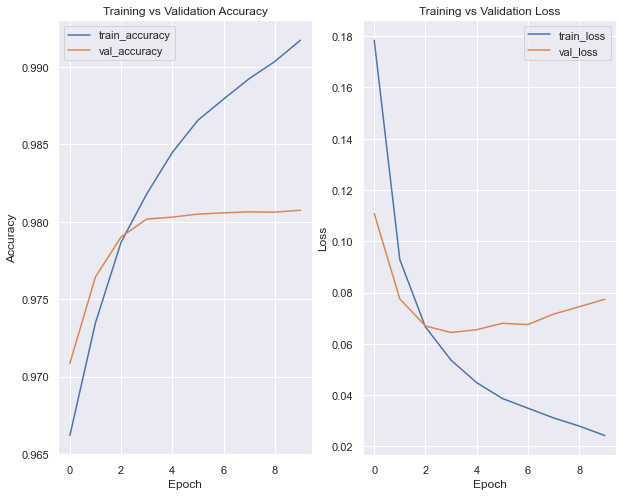

In [108]:
plot_performance(epochs)

In [102]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):
    
    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))
     
    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)
    
    len_orginal_sententce = len(word_list)
    
    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)
    
    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce] 
    
    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])
    
    return orginal_sententce,  pred_tag_list

In [101]:
X_test[520]

array([  23,    9, 2644,    2, 2061,    2,  729,   73,  372,   85,   23,
       1445,  233,  154,  921,   21, 5261,  174,    6,    1,   50,   66,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [104]:
orginal_sententce,  pred_tag_list = make_prediction(model, X_test[520], map2word, map2tag)

In [105]:
orginal_sententce

'he has lived in exile in nigeria since 2003 when he stepped down under pressure from advancing rebels and the united states'

In [106]:
pred_tag_list

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'B-tim',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo']